In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from tabulate import tabulate

In [2]:
df = pd.read_csv('flights.csv')

In [3]:
rows, cols = df.shape
print("Number of Rows :", rows)
print("Number of Columns :", cols)

Number of Rows : 336776
Number of Columns : 21


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              336776 non-null  int64  
 1   year            336776 non-null  int64  
 2   month           336776 non-null  int64  
 3   day             336776 non-null  int64  
 4   dep_time        328521 non-null  float64
 5   sched_dep_time  336776 non-null  int64  
 6   dep_delay       328521 non-null  float64
 7   arr_time        328063 non-null  float64
 8   sched_arr_time  336776 non-null  int64  
 9   arr_delay       327346 non-null  float64
 10  carrier         336776 non-null  object 
 11  flight          336776 non-null  int64  
 12  tailnum         334264 non-null  object 
 13  origin          336776 non-null  object 
 14  dest            336776 non-null  object 
 15  air_time        327346 non-null  float64
 16  distance        336776 non-null  int64  
 17  hour      

In [5]:
df.isnull().any()

id                False
year              False
month             False
day               False
dep_time           True
sched_dep_time    False
dep_delay          True
arr_time           True
sched_arr_time    False
arr_delay          True
carrier           False
flight            False
tailnum            True
origin            False
dest              False
air_time           True
distance          False
hour              False
minute            False
time_hour         False
name              False
dtype: bool

In [6]:
df.isnull().sum()

id                   0
year                 0
month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay         8255
arr_time          8713
sched_arr_time       0
arr_delay         9430
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
air_time          9430
distance             0
hour                 0
minute               0
time_hour            0
name                 0
dtype: int64

In [7]:
df.head()

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
0,0,2013,1,1,517.0,515,2.0,830.0,819,11.0,...,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,United Air Lines Inc.
1,1,2013,1,1,533.0,529,4.0,850.0,830,20.0,...,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,United Air Lines Inc.
2,2,2013,1,1,542.0,540,2.0,923.0,850,33.0,...,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,American Airlines Inc.
3,3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,...,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,JetBlue Airways
4,4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,...,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,Delta Air Lines Inc.


In [8]:
df.tail()

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
336771,336771,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,...,3393,NaN,JFK,DCA,NaN,213,14,55,2013-09-30 14:00:00,Endeavor Air Inc.
336772,336772,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,...,3525,NaN,LGA,SYR,NaN,198,22,0,2013-09-30 22:00:00,Endeavor Air Inc.
336773,336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,...,3461,N535MQ,LGA,BNA,NaN,764,12,10,2013-09-30 12:00:00,Envoy Air
336774,336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,...,3572,N511MQ,LGA,CLE,NaN,419,11,59,2013-09-30 11:00:00,Envoy Air
336775,336775,2013,9,30,NaN,840,NaN,NaN,1020,NaN,...,3531,N839MQ,LGA,RDU,NaN,431,8,40,2013-09-30 08:00:00,Envoy Air


In [9]:
df.describe()

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
count,336776.000000,336776.0,336776.000000,336776.000000,328521.000000,336776.000000,328521.000000,328063.000000,336776.000000,327346.000000,336776.000000,327346.000000,336776.000000,336776.000000,336776.000000
mean,168387.500000,2013.0,6.548510,15.710787,1349.109947,1344.254840,12.639070,1502.054999,1536.380220,6.895377,1971.923620,150.686460,1039.912604,13.180247,26.230100
std,97219.001466,0.0,3.414457,8.768607,488.281791,467.335756,40.210061,533.264132,497.457142,44.633292,1632.471938,93.688305,733.233033,4.661316,19.300846
min,0.000000,2013.0,1.000000,1.000000,1.000000,106.000000,-43.000000,1.000000,1.000000,-86.000000,1.000000,20.000000,17.000000,1.000000,0.000000
25%,84193.750000,2013.0,4.000000,8.000000,907.000000,906.000000,-5.000000,1104.000000,1124.000000,-17.000000,553.000000,82.000000,502.000000,9.000000,8.000000
50%,168387.500000,2013.0,7.000000,16.000000,1401.000000,1359.000000,-2.000000,1535.000000,1556.000000,-5.000000,1496.000000,129.000000,872.000000,13.000000,29.000000
75%,252581.250000,2013.0,10.000000,23.000000,1744.000000,1729.000000,11.000000,1940.000000,1945.000000,14.000000,3465.000000,192.000000,1389.000000,17.000000,44.000000
max,336775.000000,2013.0,12.000000,31.000000,2400.000000,2359.000000,1301.000000,2400.000000,2359.000000,1272.000000,8500.000000,695.000000,4983.000000,23.000000,59.000000


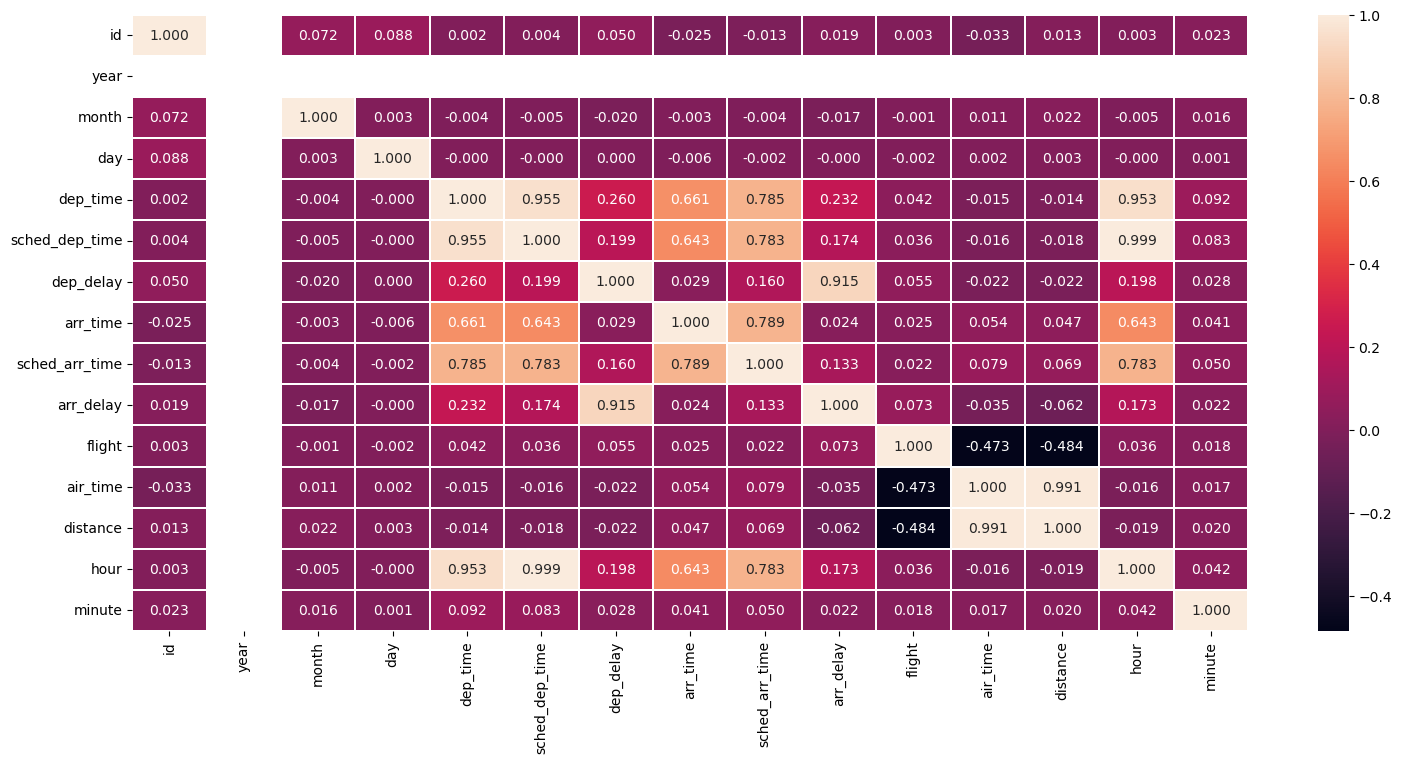

In [10]:
plt.figure(figsize=(18,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.3f', linewidth=.3);

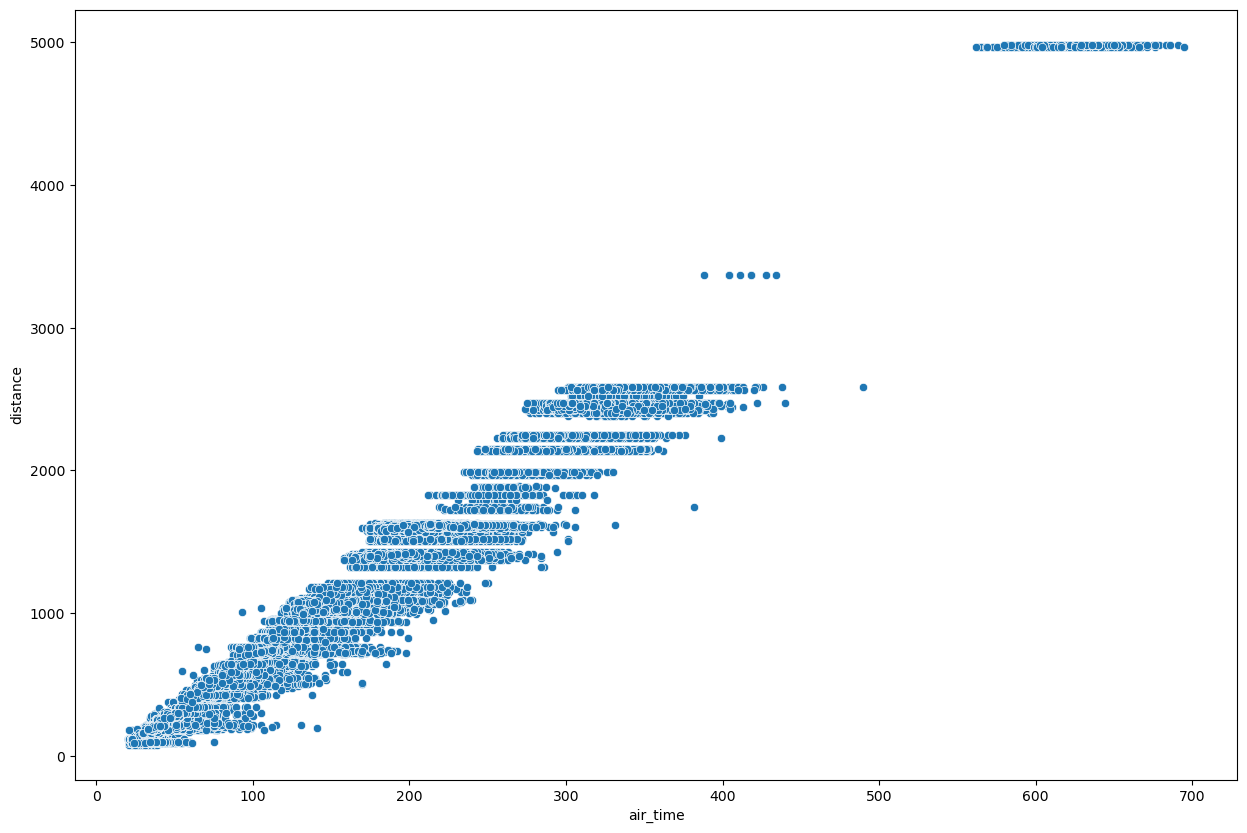

In [11]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=df, x='air_time', y='distance');

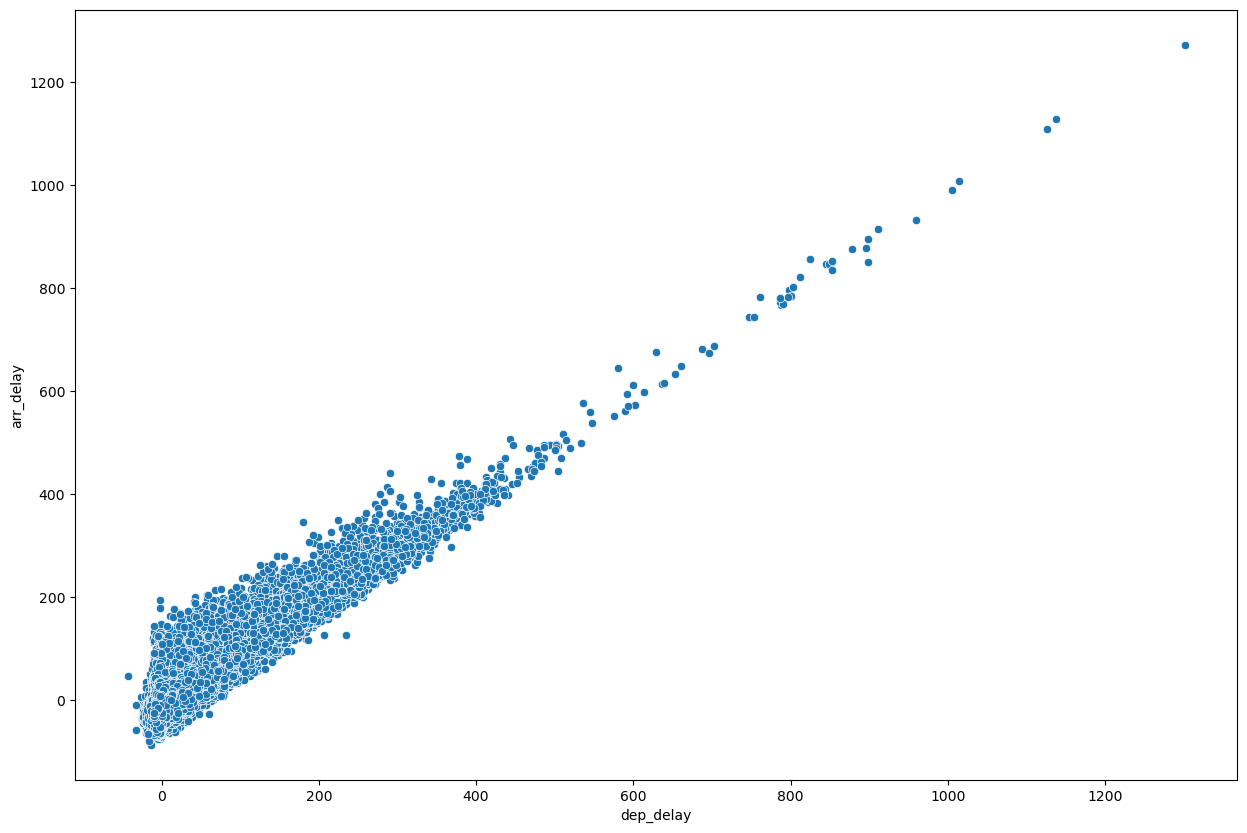

In [12]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=df, x='dep_delay', y='arr_delay');

In [13]:
num_df = df.select_dtypes(include=['float','int'])
num_df

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
0,0,2013,1,1,517.0,515,2.0,830.0,819,11.0,1545,227.0,1400,5,15
1,1,2013,1,1,533.0,529,4.0,850.0,830,20.0,1714,227.0,1416,5,29
2,2,2013,1,1,542.0,540,2.0,923.0,850,33.0,1141,160.0,1089,5,40
3,3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,725,183.0,1576,5,45
4,4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,461,116.0,762,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,336771,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,3393,NaN,213,14,55
336772,336772,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,3525,NaN,198,22,0
336773,336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,3461,NaN,764,12,10
336774,336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,3572,NaN,419,11,59


In [14]:
num_df.drop(['id', 'year', 'month', 'day', 'flight', 'hour', 'minute'], axis=1, inplace=True)
num_df

,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,air_time,distance
0,517.0,515,2.0,830.0,819,11.0,227.0,1400
1,533.0,529,4.0,850.0,830,20.0,227.0,1416
2,542.0,540,2.0,923.0,850,33.0,160.0,1089
3,544.0,545,-1.0,1004.0,1022,-18.0,183.0,1576
4,554.0,600,-6.0,812.0,837,-25.0,116.0,762
...,...,...,...,...,...,...,...,...
336771,NaN,1455,NaN,NaN,1634,NaN,NaN,213
336772,NaN,2200,NaN,NaN,2312,NaN,NaN,198
336773,NaN,1210,NaN,NaN,1330,NaN,NaN,764
336774,NaN,1159,NaN,NaN,1344,NaN,NaN,419


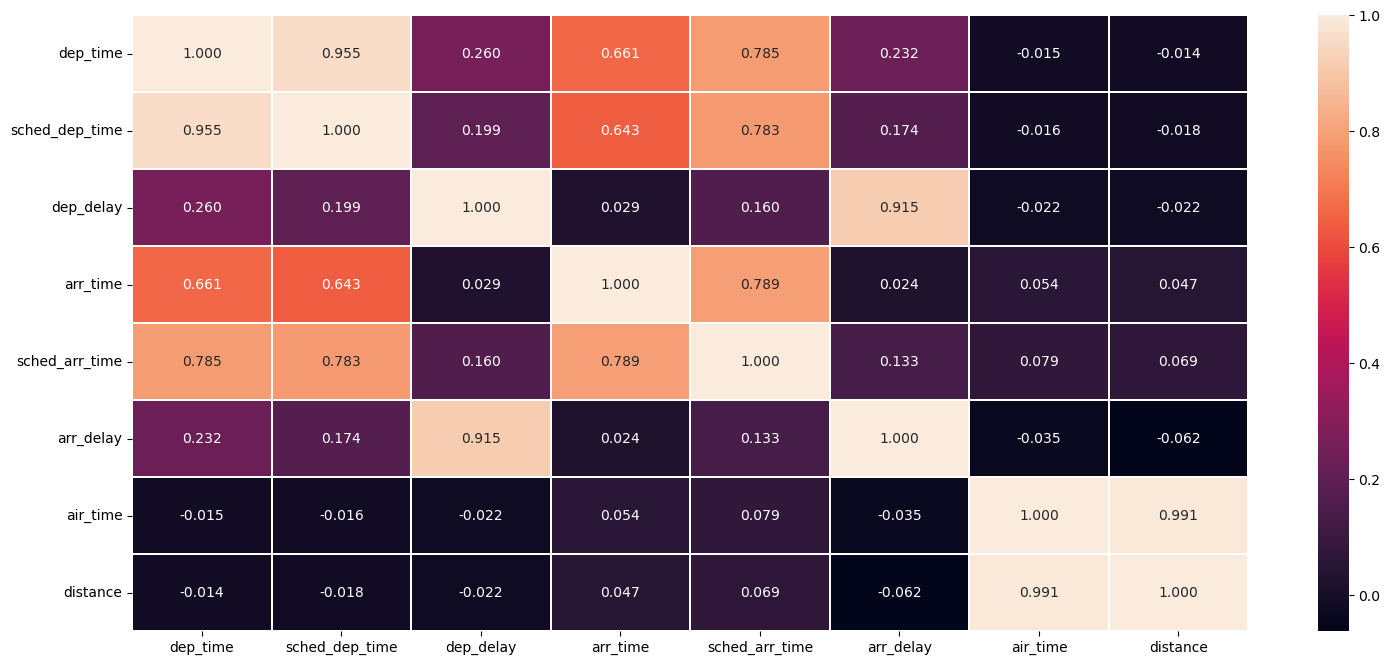

In [15]:
plt.figure(figsize=(18,8))
sns.heatmap(num_df.corr(numeric_only=True), annot=True, fmt='.3f', linewidth=.3);

In [16]:
num_df.columns

Index(['dep_time', 'sched_dep_time', 'dep_delay', 'arr_time', 'sched_arr_time',
       'arr_delay', 'air_time', 'distance'],
      dtype='object')

In [17]:
summary_df = pd.DataFrame(columns=["Column", "Mean", "Trimmed Mean", "Median", "Standard Deviiation", "Variance", "Skewness", "Kurtosis", "Mode"])

for col in num_df.columns:
    mean = num_df[col].mean()
    trimmed_mean = stats.trim_mean(num_df[col], 0.1)
    median = num_df[col].median()
    std = num_df[col].std()
    var = num_df[col].var()
    skew = num_df[col].skew()
    kurt = num_df[col].kurtosis()
    mode = num_df[col].mode().values[0]
    summary_df = pd.concat([summary_df, pd.DataFrame({
        "Column" : [col],
        "Mean" : [mean],
        "Trimmed Mean" : [trimmed_mean],
        "Median" : [median],
        "Standard Deviiation" : [std],
        "Variance" : [var],
        "Skewness" : [skew],
        "Kurtosis" : [kurt],
        "Mode" : [mode]})],
        ignore_index = True)

summary_df

,Column,Mean,Trimmed Mean,Median,Standard Deviiation,Variance,Skewness,Kurtosis,Mode
0,dep_time,1349.109947,1367.412446,1401.0,488.281791,238419.107423,-0.024743,-1.088320,555.0
1,sched_dep_time,1344.254840,1341.603640,1359.0,467.335756,218402.708588,-0.005858,-1.197903,600.0
2,dep_delay,12.639070,4.798201,-2.0,40.210061,1616.848997,4.802541,43.950116,-5.0
3,arr_time,1502.054999,1548.448430,1535.0,533.264132,284370.634467,-0.467819,-0.192634,1008.0
4,sched_arr_time,1536.380220,1550.673735,1556.0,497.457142,247463.607644,-0.353138,-0.382248,1025.0
5,arr_delay,6.895377,0.961236,-5.0,44.633292,1992.130727,3.716817,29.233044,-13.0
6,air_time,150.686460,146.163468,129.0,93.688305,8777.498430,1.070705,0.863077,42.0
7,distance,1039.912604,955.268163,872.0,733.233033,537630.681157,1.128690,1.193640,2475.0


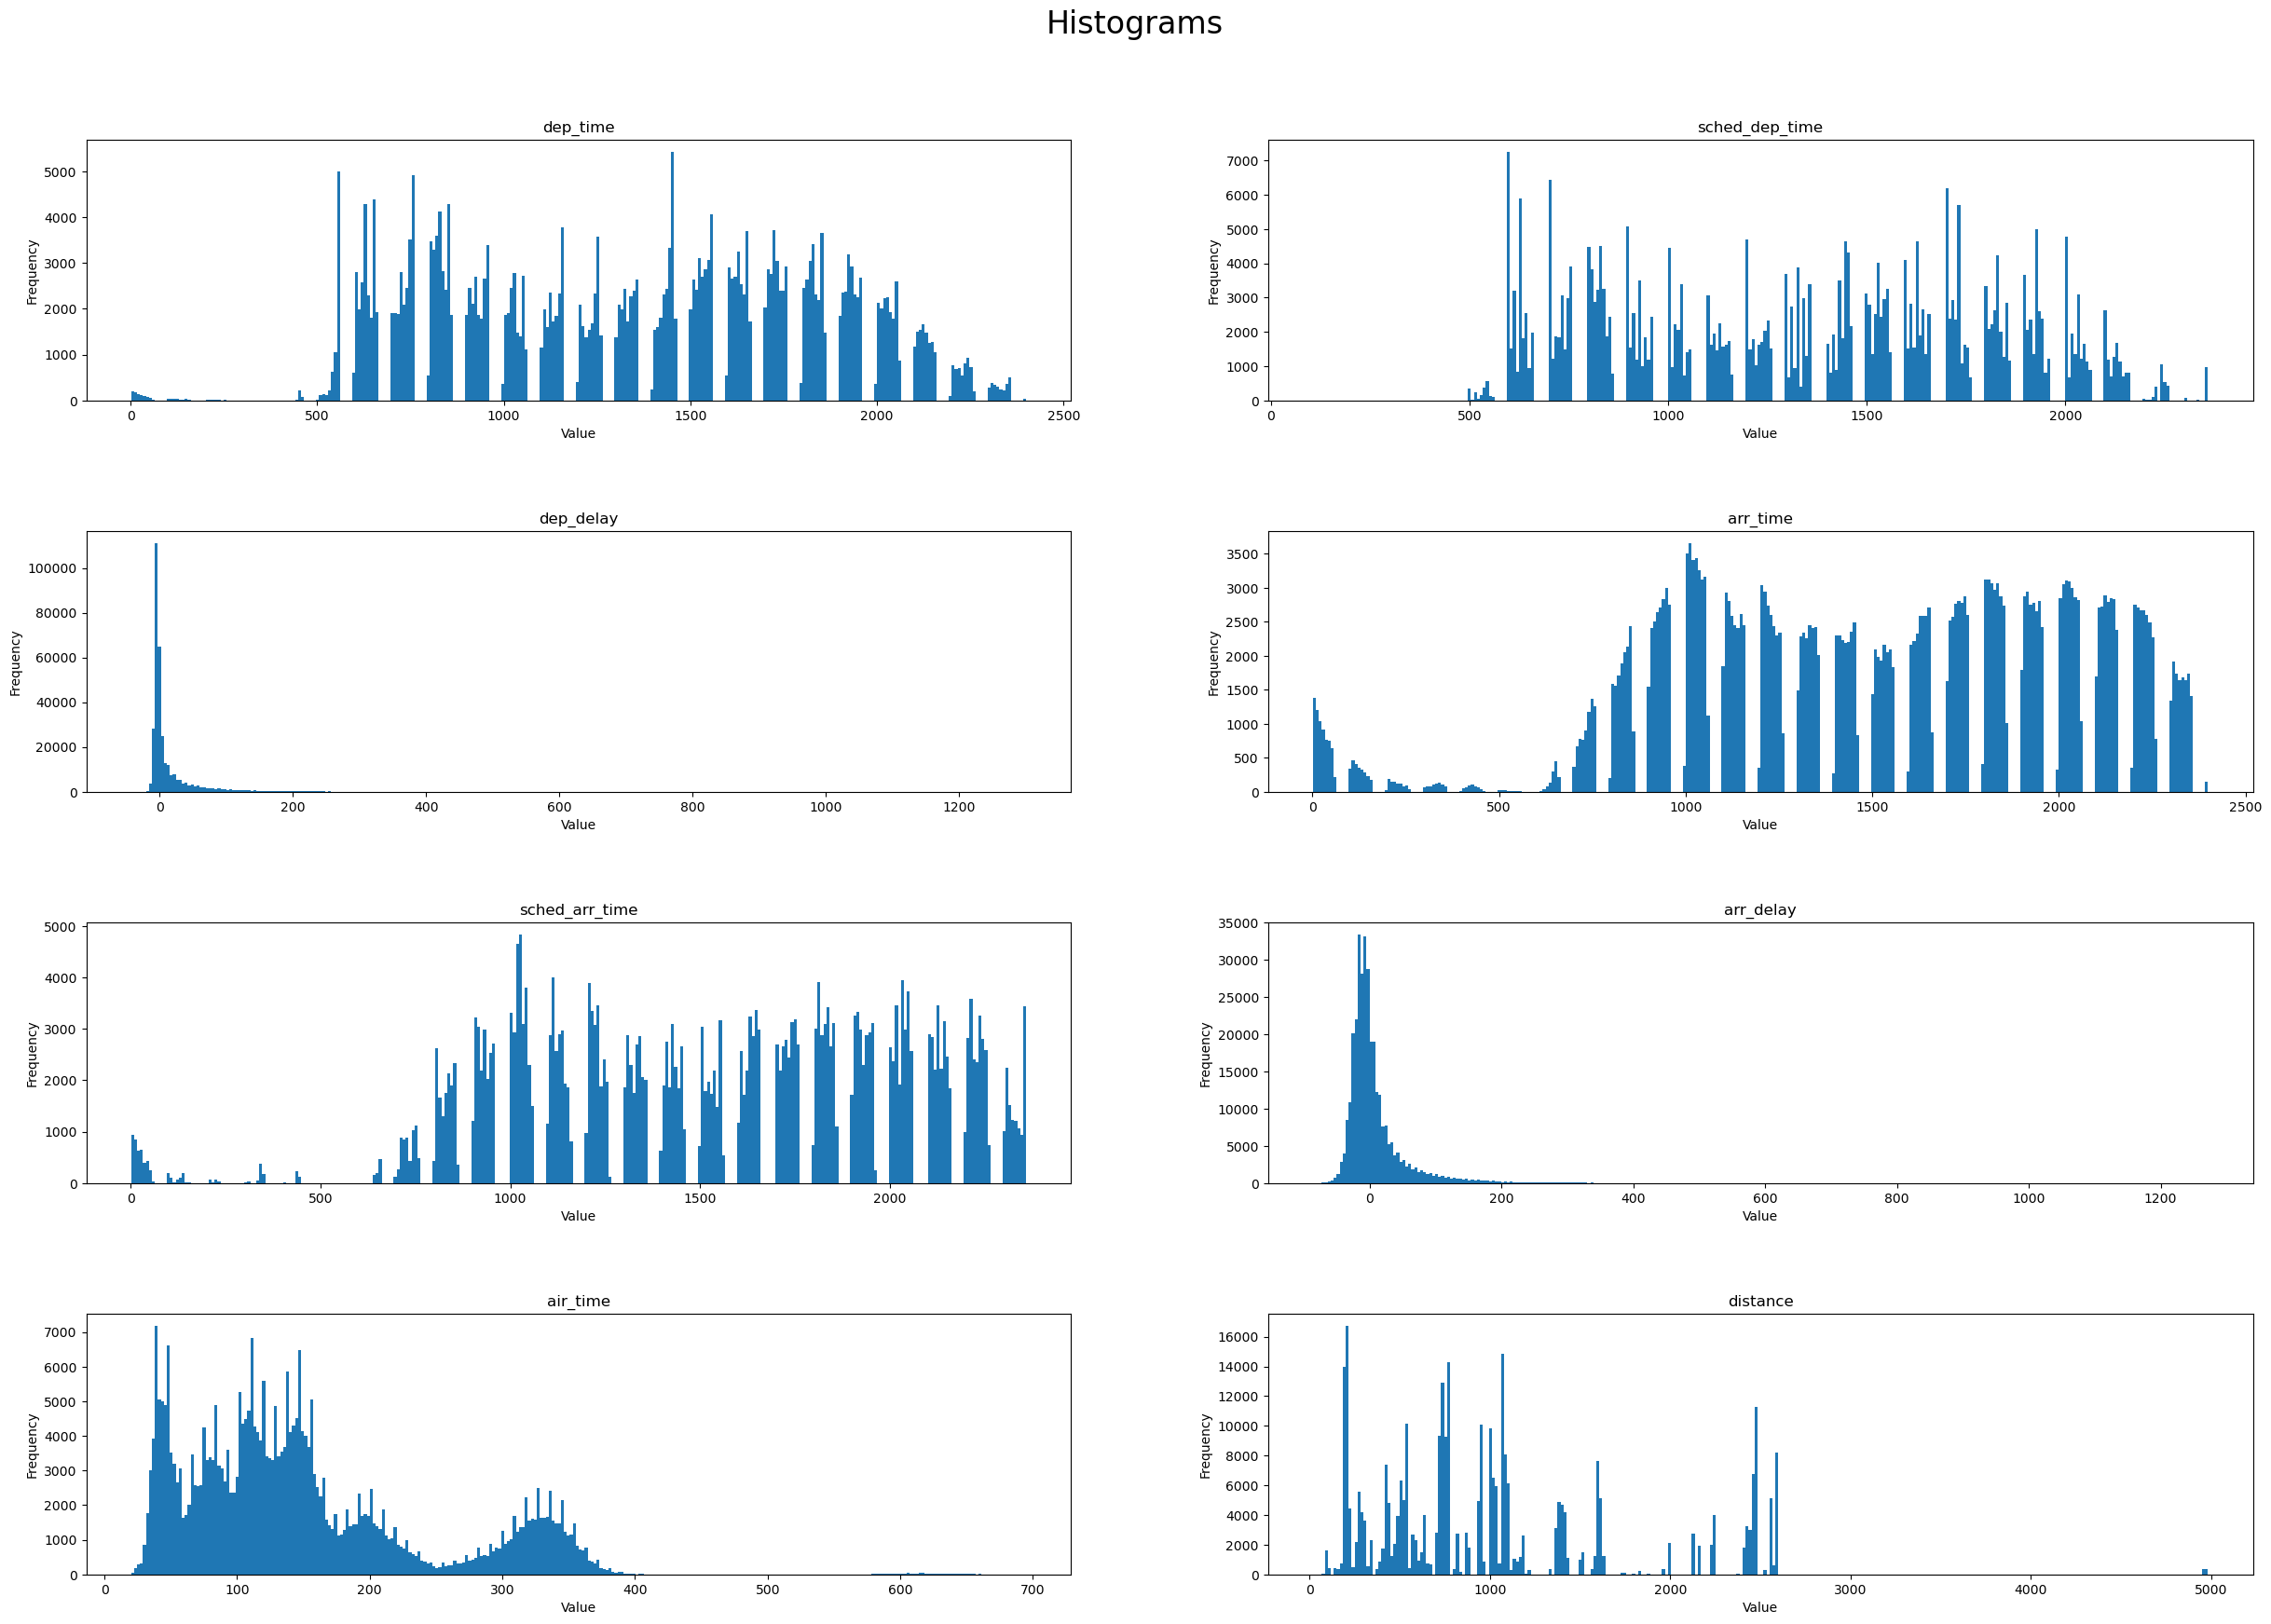

In [18]:
fig = plt.figure(figsize=(30,20))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Histograms", fontsize=24, y=0.95)

for n, col in enumerate(num_df.columns):
    ax = plt.subplot(4, 2, n+1)
    ax.set_title(col)
    ax.set_xlabel("Value")
    ax.set_ylabel("Frequency")
    plt.hist(num_df[col], bins=300)
    
plt.show()
fig.savefig("Output.png")

In [19]:
df.groupby("name")["dep_delay"].max().sort_values()

name
SkyWest Airlines Inc.           154.0
Alaska Airlines Inc.            225.0
Mesa Airlines Inc.              387.0
Southwest Airlines Co.          471.0
United Air Lines Inc.           483.0
US Airways Inc.                 500.0
JetBlue Airways                 502.0
ExpressJet Airlines Inc.        548.0
AirTran Airways Corporation     602.0
Virgin America                  653.0
Endeavor Air Inc.               747.0
Frontier Airlines Inc.          853.0
Delta Air Lines Inc.            960.0
American Airlines Inc.         1014.0
Envoy Air                      1137.0
Hawaiian Airlines Inc.         1301.0
Name: dep_delay, dtype: float64

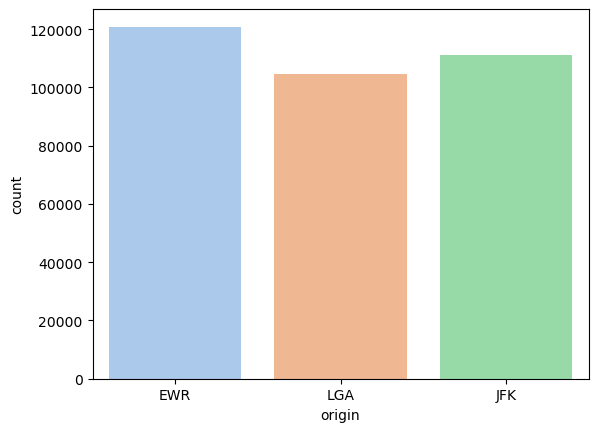

In [20]:
sns.countplot(data=df, x='origin', palette='pastel');